# Covid-19 (Corona Virus) Dataset in South Korea
## by Cherif Arsanious

## Preliminary Wrangling

> From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

COVID-19 has infected more than 8000 people in South Korea.
KCDC (Korea Centers for Disease Control & Prevention) announces the information of COVID-19 quickly and transparently.
Kaggle website made a structured dataset based on the report materials of KCDC and local governments.
Also, we analyze and visualize the data using various data mining or visualization techniques.

link to Kaggle dataset https://www.kaggle.com/kimjihoo/coronavirusdataset


In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# importing my files from my github repository to be start working on my google colab jyputer notebooks
! git clone https://github.com/CherifArsanious/corona-virus-data-south-korea.git

Cloning into 'corona-virus-data-south-korea'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 44 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


> My main dataset is PatientInfo.csv dataset. It complies with the requirements that were asked for a dataset different from the ones available on udacity platform of the project
Dataset Requirements:
* include at least 600 observations. (This is the number of rows after tidying your data - see the bullet point below about tidy data.) --> My dataset contains 2243 observations
* include at least eight variables --> my dataset contains 18 variables
* include at least one qualitative / categorical variable. (This can also be engineered / created.) --> my dataset contains more than 10 categorical variables
* include at least one numeric variable. --> my dataset contains one numeric variable
* be in a tidy format. In a nutshell, tidy data has each row as a single observation and each column reporting a single variable. --> The dataset was cleaned by kaggle website already and ready for analysis and visualizations
* be in a common data format. This includes .csv, .tsv, .txt, and .xls. Basically, there should be a reasonable pandas.read_*() function to open up your data in a tidy format as a pandas DataFrame. --> the PatientInfo dataset is stored in .csv format

> I included two additional small datasets Weather.csv, and Region.csv that were not required for this project but I felt they behold interesting information about the Covid-19 virus  


## Loading the Datasets

In [0]:
# loading the main dataset (PatientInfo.csv) and the two additional optional datasets (Weather.csv, Region.csv)
patient_df = pd.read_csv('PatientInfo.csv')
region_df = pd.read_csv('Region.csv')
weather_df = pd.read_csv('Weather.csv')

## Detecting Structure of Main Dataset
* Dimensions of my dataset
* Number of observations 
* Number of variables
* Types of variables
* Describtion of dataset
* Main overview

In [5]:
# Overview of the dataset 
patient_df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
patient_df.tail()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2238,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released
2242,7000000004,5534.0,male,1974.0,40s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,74.0,NaN,2020-03-04,NaN,NaN,isolated


In [7]:
# number of rows and columns in the dataset
print('the number of observations in this dataset is: {}'.format(patient_df.shape[0]))
print()
print('The number of variables in this dataset is: {}'.format(patient_df.shape[1]))
print()

the number of observations in this dataset is: 2243

The number of variables in this dataset is: 18



* I will group by patinets number by 'province' and merge the result with the two additional datasets to make them ready for visualizations

In [8]:
patient_df_subset = patient_df.groupby(['province'])['patient_id'].count()
patient_df_subset = pd.DataFrame(patient_df_subset)
patient_df_subset = patient_df_subset.reset_index()
patient_df_subset = patient_df_subset.rename(columns={'patient_id':'nb_of_patients'})

patient_df_subset

,province,nb_of_patients
0,Busan,101
1,Chungcheongbuk-do,28
2,Chungcheongnam-do,118
3,Daegu,63
4,Daejeon,22
5,Gangwon-do,29
6,Gwangju,19
7,Gyeonggi-do,300
8,Gyeongsangbuk-do,1054
9,Gyeongsangnam-do,85


In [9]:
# The dataset is organized that each province is summarized in one row then it is detailed in subsequent rows to each city
# so i only need the rows where the data of each province is summarized
region_df

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [10]:
region_df_subset = region_df.query('province == city')
#drop the last row where it sums all the data of Korea
region_df_subset = region_df_subset.drop(243)
region_df_subset

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
26,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
43,12000,Daegu,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
52,13000,Gwangju,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
58,14000,Incheon,Incheon,37.456188,126.705920,250,403,7,1.27,13.20,5.8,4497
69,15000,Daejeon,Daejeon,36.350621,127.384744,148,260,15,1.49,13.65,5.8,2984
75,16000,Ulsan,Ulsan,35.539797,129.311538,119,200,4,2.21,11.76,5.2,1801
81,17000,Sejong,Sejong,36.480132,127.289021,48,60,3,1.78,9.48,3.8,491
82,20000,Gyeonggi-do,Gyeonggi-do,37.275119,127.009466,1277,2237,61,1.60,12.63,5.2,20491
114,30000,Gangwon-do,Gangwon-do,37.885369,127.729868,349,368,18,1.42,19.89,9.8,2519


In [11]:
weather_df.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-03-17,9.3,2.0,14.7,0.0,3.2,70.0,40.9
1,10000,Seoul,2016-03-18,13.4,8.8,20.1,0.0,5.0,110.0,50.0
2,10000,Seoul,2016-03-19,11.4,6.6,18.1,0.0,4.8,320.0,58.3
3,10000,Seoul,2016-03-20,10.6,4.9,17.5,0.0,4.6,320.0,54.0
4,10000,Seoul,2016-03-21,9.9,5.5,16.1,0.0,5.4,320.0,54.1


In [36]:
weather_df_subset = weather_df.groupby(['province'])['avg_temp','max_wind_speed','avg_relative_humidity'].mean()
weather_df_subset = weather_df_subset.reset_index()
weather_df_subset

,province,avg_temp,max_wind_speed,avg_relative_humidity
0,Busan,15.571800,6.330048,63.289665
1,Chungcheongbuk-do,12.478904,3.873032,65.641575
2,Chungcheongnam-do,12.681680,4.737971,75.756749
3,Daegu,14.655685,4.951677,60.638398
4,Daejeon,13.928884,3.861259,68.958932
5,Gangwon-do,14.251061,5.011157,55.924435
6,Gwangju,14.899316,4.102806,70.166530
7,Gyeonggi-do,13.189733,4.434771,69.031280
8,Gyeongsangbuk-do,13.940316,6.049418,63.094693
9,Gyeongsangnam-do,14.793908,4.468446,65.258658


* Now i will merge the three subsets together 

In [37]:
# merging the patient_df_subset with the weather_df_subset
# then merging this new subset with the region_df_subset
df_subset = pd.merge(patient_df_subset,weather_df_subset,on='province')
df_subset = pd.merge(df_subset,region_df_subset,on='province')
df_subset

,province,nb_of_patients,avg_temp,max_wind_speed,avg_relative_humidity,code,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,Busan,101,15.571800,6.330048,63.289665,11000,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
1,Chungcheongbuk-do,28,12.478904,3.873032,65.641575,40000,Chungcheongbuk-do,36.635680,127.491384,259,328,17,1.39,17.28,8.5,2769
2,Chungcheongnam-do,118,12.681680,4.737971,75.756749,41000,Chungcheongnam-do,36.658976,126.673318,409,499,21,1.38,18.40,8.9,3641
3,Daegu,63,14.655685,4.951677,60.638398,12000,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
4,Daejeon,22,13.928884,3.861259,68.958932,15000,Daejeon,36.350621,127.384744,148,260,15,1.49,13.65,5.8,2984
5,Gangwon-do,29,14.251061,5.011157,55.924435,30000,Gangwon-do,37.885369,127.729868,349,368,18,1.42,19.89,9.8,2519
6,Gwangju,19,14.899316,4.102806,70.166530,13000,Gwangju,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
7,Gyeonggi-do,300,13.189733,4.434771,69.031280,20000,Gyeonggi-do,37.275119,127.009466,1277,2237,61,1.60,12.63,5.2,20491
8,Gyeongsangbuk-do,1054,13.940316,6.049418,63.094693,60000,Gyeongsangbuk-do,36.576032,128.505599,471,707,33,1.33,20.85,11.1,4474
9,Gyeongsangnam-do,85,14.793908,4.468446,65.258658,61000,Gyeongsangnam-do,35.238294,128.692397,501,686,21,1.78,16.51,9.1,5364


### What is the structure of your dataset?

#### Epidemiological data of COVID-19 patients in South Korea
* patient_id: the ID of the patient
* patient_id(10) = region_code(5) + patient_number(5)
You can check the region_code in 'Region.csv'
There are two types of the patient_number
1) local_num: The number given by the local government.
2) global_num: The number given by the KCDC
global_num: the number given by KCDC
There are some patients having no global_num.
The paitents in Busan doesn't have the global_num.
* sex: the sex of the patient
* birth_year: the birth year of the patient
* age: the age of the patient
0s: 0 ~ 9
10s: 10 ~ 19
...
90s: 90 ~ 99
100s: 100 ~ 109
* country: the country of the patient
* province: the province of the patient
* city: the city of the patient
* disease: TRUE: underlying disease / FALSE: no disease
* infection_case: the case of infection
* infection_order: the order of infection
infected_by: the ID of who infected the patient
This column refers to the 'patient_id' column.
* contact_number: the number of contacts with people
* symptom_onset_date: the date of symptom onset
* confirmed_date: the date of being confirmed
* released_date: the date of being released
* deceased_date: the date of being deceased
* state: isolated / released / deceased
isolated: being isolated in the hospital
released: being released from the hospital
deceased: being deceased

### What is/are the main feature(s) of interest in your dataset?

* I am interesting in visualizing what factors could be affecting the mortality rate in patients with corona virus

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The columns in the dataset that can help me in investigating my main interest
* Sex
* Age group
* state
* disease


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [30]:
patient_df.head(0)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


In [31]:
patient_df.dtypes

patient_id               int64
global_num             float64
sex                     object
birth_year             float64
age                   category
country                 object
province                object
city                    object
disease                 object
infection_case          object
infection_order        float64
infected_by            float64
contact_number         float64
symptom_onset_date      object
confirmed_date          object
released_date           object
deceased_date           object
state                   object
dtype: object

In [16]:
patient_df.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,2.243000e+03,1337.000000,1789.000000,42.000000,4.750000e+02,413.000000
mean,3.982459e+09,4695.880329,1974.958636,2.285714,2.582253e+09,24.019370
std,2.201274e+09,2897.824187,19.394569,1.254955,1.569408e+09,90.881148
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.600000e+09,1907.000000,1962.000000,1.250000,1.200000e+09,2.000000
50%,6.001000e+09,5233.000000,1974.000000,2.000000,2.000000e+09,5.000000
75%,6.004000e+09,7520.000000,1993.000000,3.000000,4.100000e+09,16.000000
max,7.000000e+09,8717.000000,2020.000000,6.000000,6.113000e+09,1160.000000


## Checking the distribuation of patients based on sex

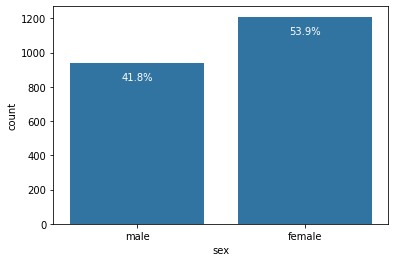

In [17]:
# checking the distribuation of patients based on sex
base_color = sb.color_palette()[0]
sb.countplot(data=patient_df,x='sex',color= base_color)
# I will add the relative frequency to get more insights
n_points = patient_df.shape[0]
sex_counts = patient_df['sex'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = sex_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-100, pct_string, ha='center',color='w')


> The number of female infected by the coronavirus is higher than the number of male infected. From the data gathered, 53.9% of patients were females where 41.8% where males

## Checking the distribution of patients based on ages

* Ages variable is an ordinal categorical variables so i need to change the type of it to categorical

In [0]:
ages_order = ['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s','100s']
ages = pd.api.types.CategoricalDtype(ordered=True, categories = ages_order)
patient_df['age']=patient_df['age'].astype(ages)

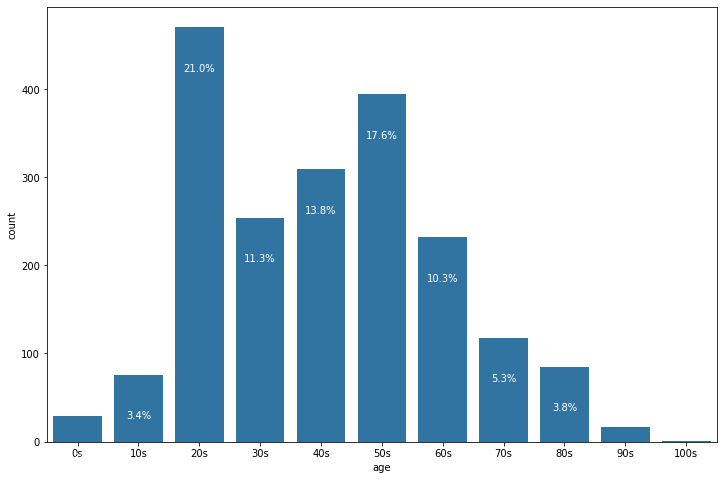

In [19]:
plt.figure(figsize=[12,8])
sb.countplot(data=patient_df,x='age',color=base_color)
n_points=patient_df.shape[0]
age_counts = patient_df['age'].value_counts()
locs,labels = plt.xticks()
for loc, label in zip(locs,labels):
    count = age_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc,count-50,pct_string,ha='center',color='w')

**This quiet interesting, because the media was propaganding that youth are almost protected from infection but the data of South Korea is showing other wise. The higher patient age ratio infected were the 20s with 21% of the whole patients, the second age range is the 50s with 17.6%. The myth that kids are among the least infected is still valid here with only 3.4% of the patients**

In [0]:
patient_df_deceased=patient_df[patient_df['state']=='deceased']

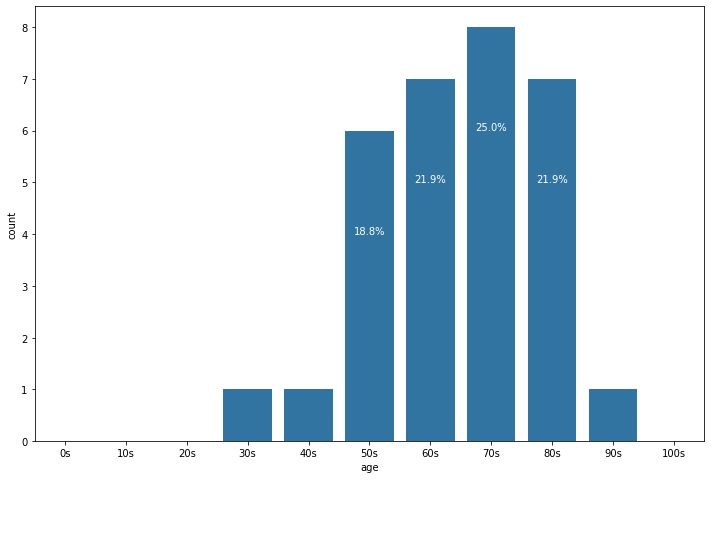

In [21]:
plt.figure(figsize=[12,8])
sb.countplot(data=patient_df_deceased,x='age',color=base_color)
n_points = patient_df_deceased.shape[0]
age_counts = patient_df_deceased['age'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = age_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points) 
    plt.text(loc,count-2,pct_string,ha='center',color='w')

**This plot implies that also the age range 20s where infected the highest but the mortality rate is 0%. More than 60% of deceased patients where older than their 40s**

## Checking the distribution of number of people contacted

Text(0, 0.5, 'frequency')

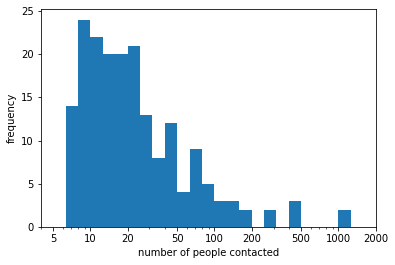

In [22]:
bin_edges = 10**np.arange(0.8,np.log10(patient_df['contact_number'].max())+0.1,0.1)
plt.hist(data= patient_df, x='contact_number',bins=bin_edges)
plt.xscale('log')
tick_locs = [1,2,5,10,20,50,100,200,500,1000,2000,5000]
plt.xticks(tick_locs,tick_locs);
plt.xlim(4,2000)
plt.xlabel('number of people contacted')
plt.ylabel('frequency')

**The majority of patients contacted between 10 and 25 persons before being diagnosed with the coronavirus, and that probably explains why it is has a wide spread and transmission, specially the virus has an incubation period of 14 days.**

## Checking the distribuation of patients across different provinces of South Korea

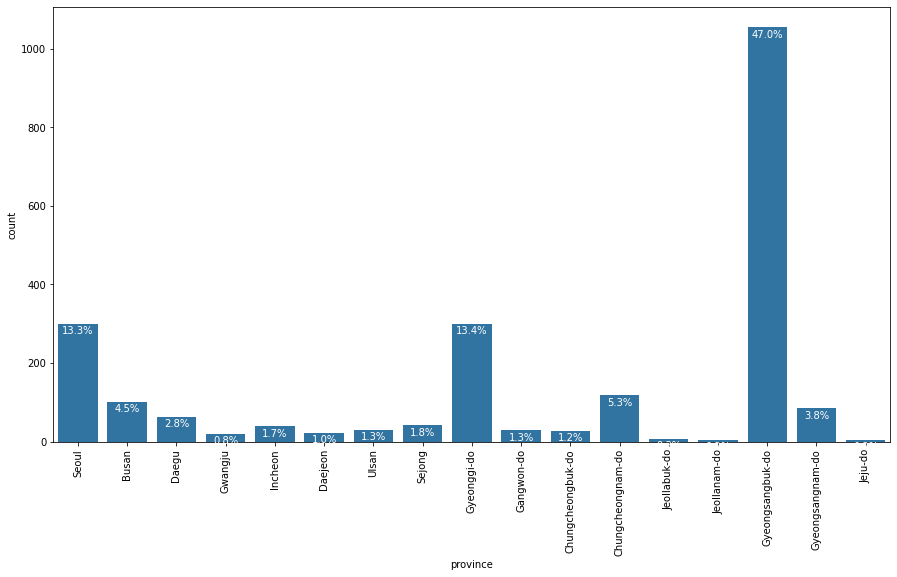

In [23]:
plt.figure(figsize=[15,8])
sb.countplot(data = patient_df, x = 'province',color=base_color)
n_points= patient_df.shape[0]
province_counts = patient_df['province'].value_counts()
locs,labels = plt.xticks()
for loc, label in zip(locs,labels):
    count = province_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(count*100/n_points)
    plt.text(loc, count-25,pct_string,ha='center',color='w');
plt.xticks(rotation=90);

The province with the highest number of infections is Gyeonigsangbuk-do with more than 1000 cases which represent about 47% of cases in South Korea

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Investigating the age variable as a categorical variable under the sex variable

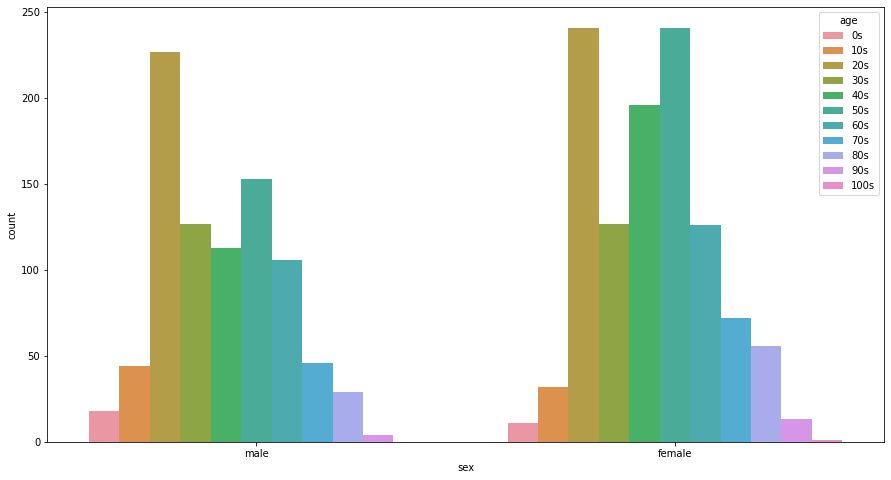

In [43]:
plt.figure(figsize=[15,8])
sb.countplot(data= patient_df, x='sex',hue='age',hue_order=['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s','100s'])

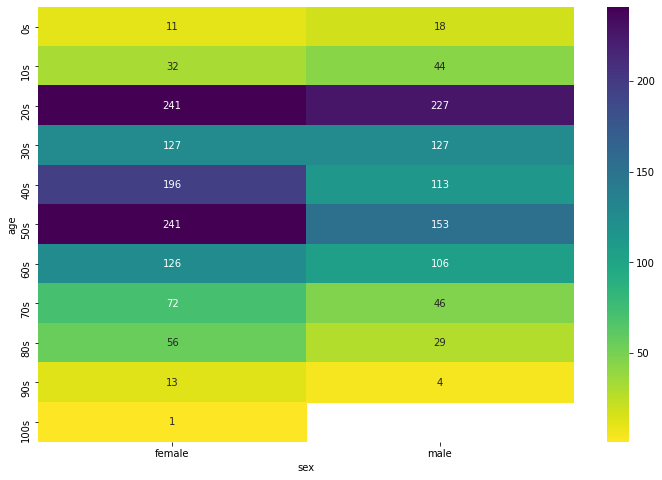

In [67]:
plt.figure(figsize=[12,8])
sex_age_counts = patient_df.groupby(['sex','age']).size()
sex_age_counts = sex_age_counts.reset_index(name='count')
sex_age_counts = sex_age_counts.pivot(index='age',columns='sex',values='count')
sb.heatmap(sex_age_counts,annot=True,fmt='0.0f',cmap='viridis_r');

from inspecting sex and age variables by clustered barchart and heatmapping, the people in their 20s are still the highest in getting infectied by the coronavirus wether female or male, and after them are people in their 50s as as noted before in the univariate exploaration of sex, female are more suceptible to get infected in almost every age ranges except in young patients below 20s where more male patients than female patients. 

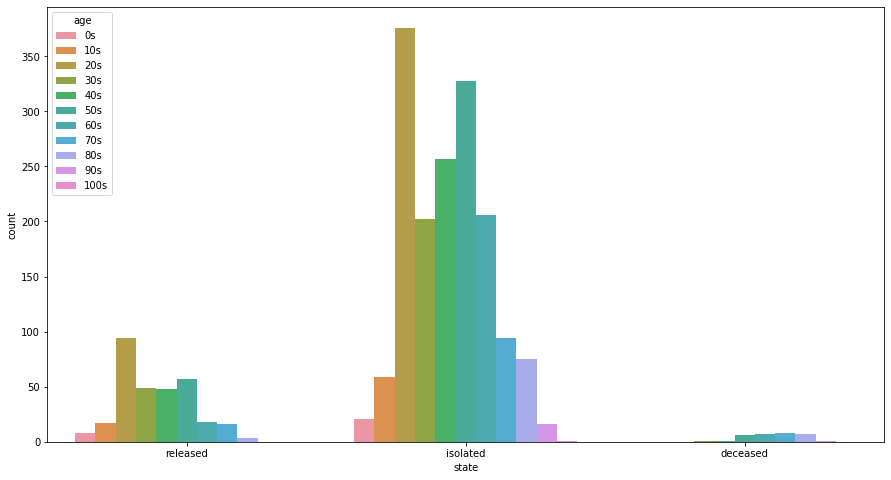

In [44]:
plt.figure(figsize=[15,8])
sb.countplot(data= patient_df, x='state',hue='age',hue_order=['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s','100s'])

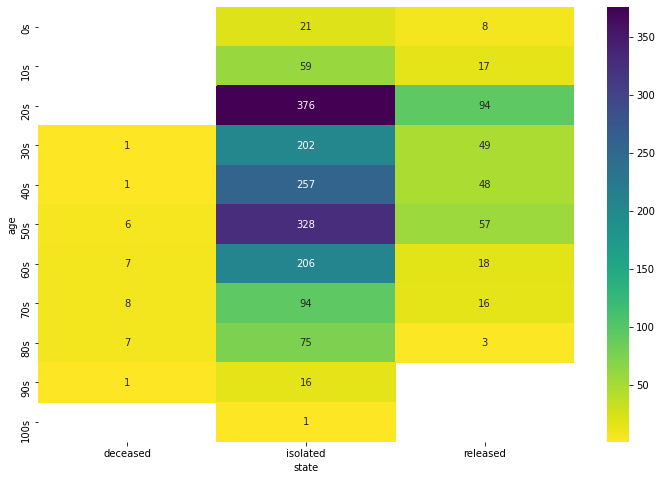

In [66]:
plt.figure(figsize=[12,8])
ct_counts = patient_df.groupby(['state','age']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'age', columns = 'state', values='count')
sb.heatmap(ct_counts, annot=True, fmt ='0.0f',cmap='viridis_r')

By visual inspecting both the state variable and the age range variable through clustered bar chart and heat mapping, it appears that although the people in their 20s were the  highest in getting infected but it appears here that they recorded zero deathes and patinets under 30s in general did not record any death in this dataset, and all the deathes occured for people above 30s with the majority hapening for patients between 50s till 80s. 

### Inspecting the state variable with sex variable 

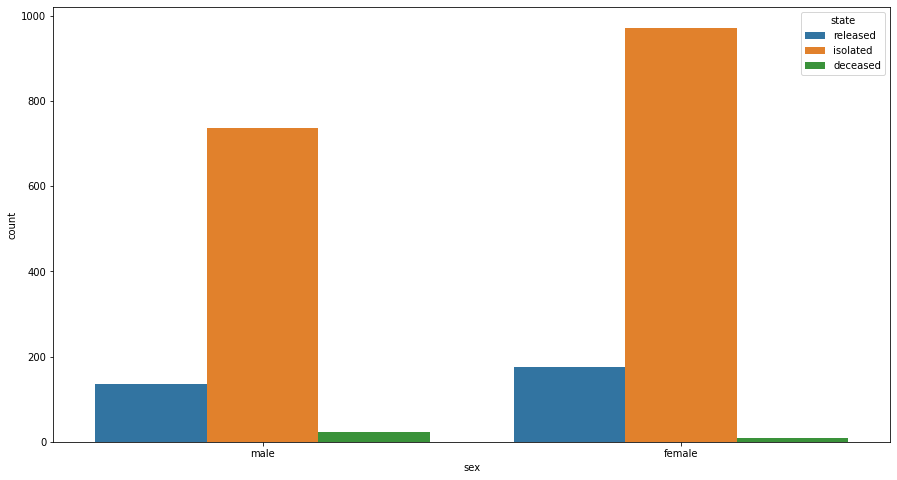

In [46]:
plt.figure(figsize=[15,8])
sb.countplot(data= patient_df, x='sex',hue='state');

In [48]:
patient_df.groupby(['sex','state']).size()

sex     state   
female  deceased      9
        isolated    972
        released    176
male    deceased     22
        isolated    736
        released    136
dtype: int64

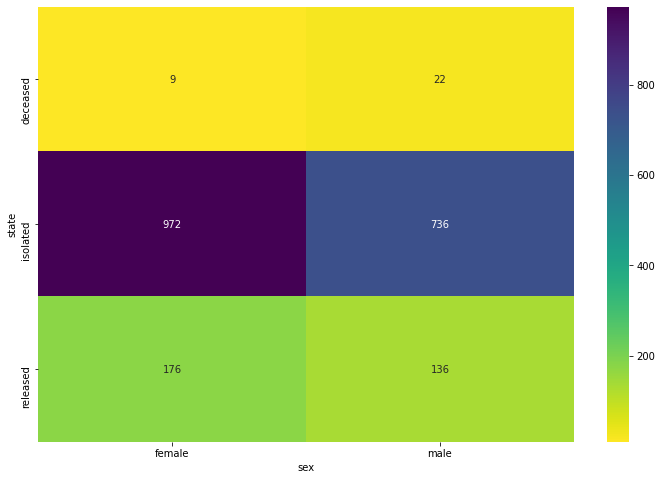

In [68]:
plt.figure(figsize=[12,8])
ct_counts = patient_df.groupby(['sex','state']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'state', columns = 'sex', values='count')
sb.heatmap(ct_counts, annot=True, fmt ='d',cmap='viridis_r');

by visual inspecting the two categorical variable sex and state, i notice that although female being more suceptible to get infected but here it appears that the deathes in female is lower than in males and that female are faster to be released and so they are healing faster.

### Inspecting both contact variable and age variable together

Text(238.11666666666667, 0.5, 'frequency')

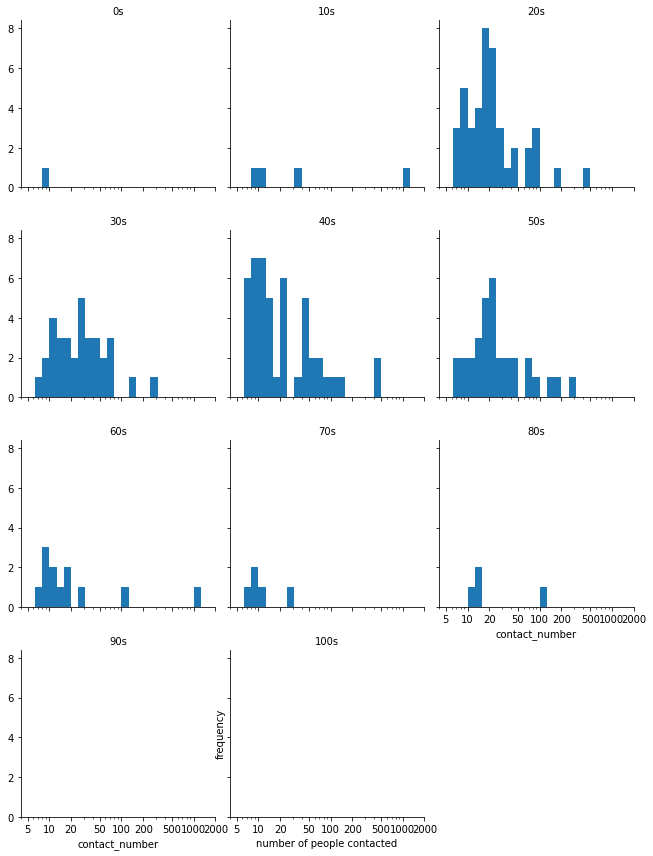

In [73]:
bin_edges = 10**np.arange(0.8,np.log10(patient_df['contact_number'].max())+0.1,0.1)
g=sb.FacetGrid(data=patient_df,col='age',col_wrap=3)
g.map(plt.hist,'contact_number',bins=bin_edges)
g.set_titles('{col_name}')
plt.xscale('log')
tick_locs = [1,2,5,10,20,50,100,200,500,1000,2000,5000]
plt.xticks(tick_locs,tick_locs);
plt.xlim(4,2000)
plt.xlabel('number of people contacted')
plt.ylabel('frequency')

from inspecting the contact number variable with age variable by faceting, it becomes apparant that one possible cause that the 20s has the hishgest infection proportion is that they widest and highest histogram spread which means that the people in their 20s come in contact with many people so they most susceptible to get infected and same wise they are also most risk to spread the virus to many people before manifesting symptoms of virus or being diagnosed positive in the coronavirus test.

## Inspecting pairs of numerical variables of (number of patients, average temperature, humidity, wind speed, number of (kinergartens, schools and universities), and elderly ratio across the different provinces in South Korea

In [74]:
df_subset.head()

,province,nb_of_patients,avg_temp,max_wind_speed,avg_relative_humidity,code,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,Busan,101,15.571800,6.330048,63.289665,11000,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
1,Chungcheongbuk-do,28,12.478904,3.873032,65.641575,40000,Chungcheongbuk-do,36.635680,127.491384,259,328,17,1.39,17.28,8.5,2769
2,Chungcheongnam-do,118,12.681680,4.737971,75.756749,41000,Chungcheongnam-do,36.658976,126.673318,409,499,21,1.38,18.40,8.9,3641
3,Daegu,63,14.655685,4.951677,60.638398,12000,Daegu,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
4,Daejeon,22,13.928884,3.861259,68.958932,15000,Daejeon,36.350621,127.384744,148,260,15,1.49,13.65,5.8,2984


In [75]:
df_subset.describe()

,nb_of_patients,avg_temp,max_wind_speed,avg_relative_humidity,code,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,137.625000,14.260133,5.061405,66.191664,32125.000000,36.095054,127.567651,377.437500,548.562500,21.062500,1.613125,16.613750,8.031250,5898.375000
std,261.732402,1.162810,1.099540,5.200992,20978.957712,1.178417,0.961835,281.502627,488.459206,15.128202,0.335931,3.301262,2.445327,6301.102124
min,4.000000,12.478904,3.861259,55.924435,10000.000000,33.488936,126.463021,113.000000,123.000000,4.000000,1.270000,11.760000,5.200000,1245.000000
25%,21.250000,13.401129,4.392009,63.240922,13750.000000,35.223692,126.815024,210.500000,324.000000,14.000000,1.397500,13.630000,5.800000,2831.250000
50%,34.500000,14.218241,4.702182,66.473797,25000.000000,36.111385,127.246768,326.500000,405.500000,18.500000,1.470000,16.145000,8.000000,3707.500000
75%,105.250000,14.824624,5.801070,69.309771,50250.000000,36.813012,128.529645,439.500000,578.000000,21.250000,1.660000,18.780000,9.275000,5153.250000
max,1054.000000,16.948734,7.905426,75.756749,70000.000000,37.885369,129.311538,1277.000000,2237.000000,61.000000,2.380000,22.810000,13.500000,22739.000000


In [0]:
df_subset.columns

In [0]:
plt.figure(figsize=[15,8])
sb.heatmap(df_subset.corr(),cmap='viridis_r',annot=True)

In [0]:
plt.figure(figsize=[15,8])
g= sb.PairGrid(data = df_subset, vars = ['nb_of_patients', 'avg_temp', 'max_wind_speed','avg_relative_humidity','elementary_school_count', 'kindergarten_count', 'university_count',
'elderly_population_ratio','nursing_home_count'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!